##Data Preprocessing - Before Building Machine Learning model


1] Import necessary libraries
2] Read Dataset
3] Sanity Check of Data  
4] Exploratory Data Analysis
5] Missing Value Treatment
6] Outliers treatment
6] Duplicates and gabage value treatments
7] Normalization
8] Encoding of Data

##1.} Import necessary libraries

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##2.} Read Dataset

In [ ]:
# Step 1: Upload Excel files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
# Step 2: Load the uploaded Excel files into pandas DataFrames
data = pd.read_csv('Train.csv')

In [ ]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
data.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


##3.} Sanity Check of Data

In [ ]:
data.shape

(23524, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
#missing values
#data.isnull().sum()

In [ ]:
#data.isnull().sum()/data.shape[0]*100

In [ ]:
#finding duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
# identifying garbage values
for i in data.select_dtypes(include='object').columns:
  print(data[i].value_counts())
  print("***"*10)

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64
******************************
uniqueid
uniqueid_17      4
uniqueid_16      4
uniqueid_18      4
uniqueid_2       4
uniqueid_3       4
                ..
uniqueid_7303    1
uniqueid_7302    1
uniqueid_7301    1
uniqueid_7300    1
uniqueid_7308    1
Name: count, Length: 8735, dtype: int64
******************************
bank_account
No     20212
Yes     3312
Name: count, dtype: int64
******************************
location_type
Rural    14343
Urban     9181
Name: count, dtype: int64
******************************
cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64
******************************
gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64
******************************
relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Oth

##4. Exploratory Data Analysis

In [ ]:
#descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [ ]:
data.describe(include= "object")

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_17,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


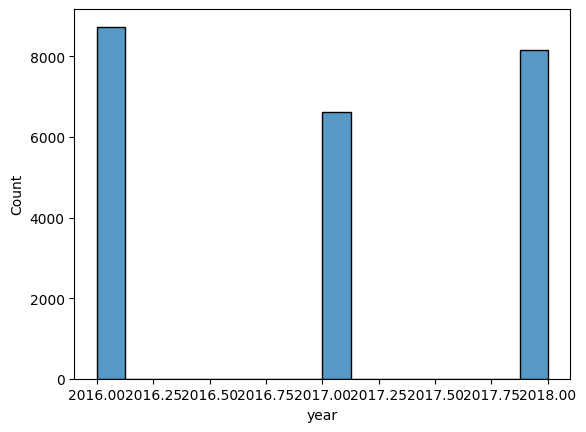

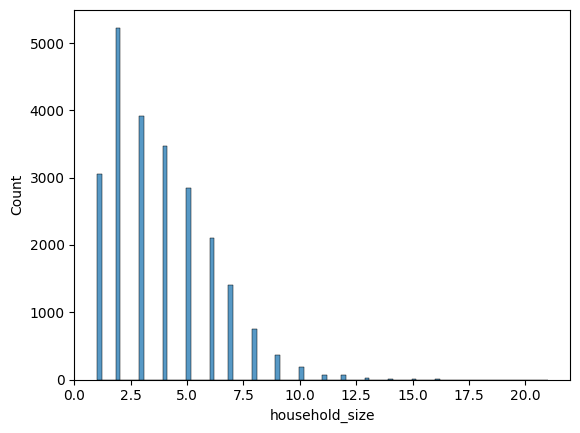

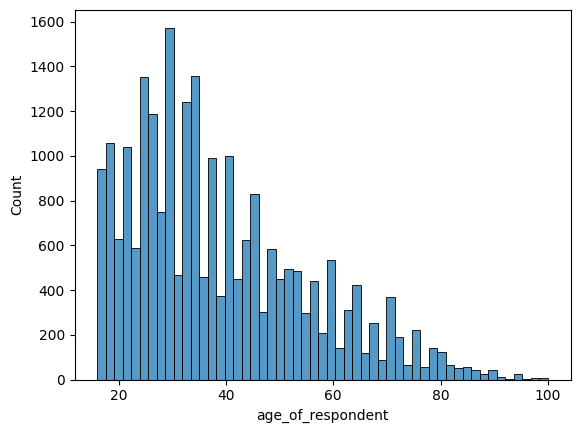

In [ ]:
#histogram to uderstand the distribution
for i in data.select_dtypes(include='number').columns:
  sns.histplot(data=data, x=i)
  plt.show()

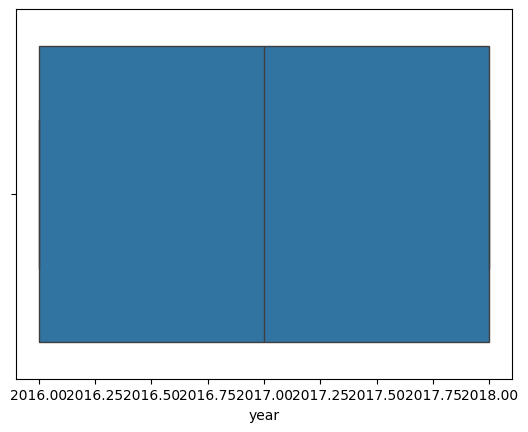

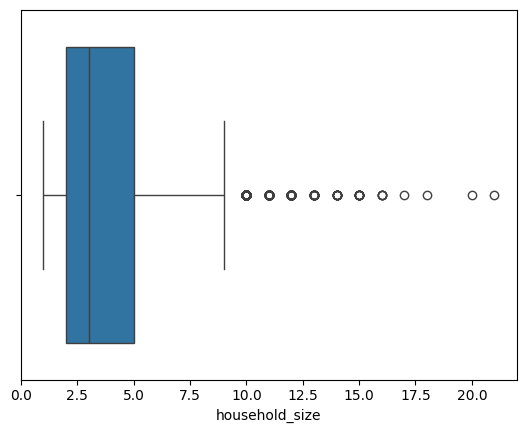

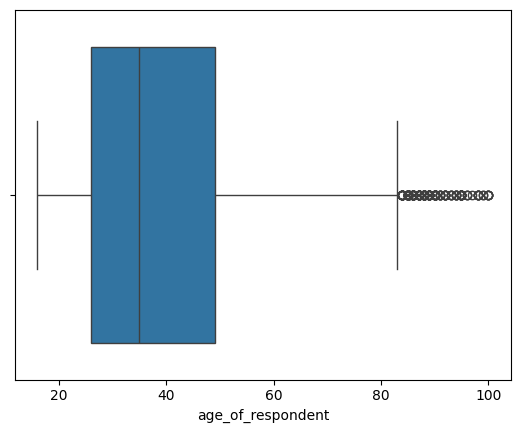

In [ ]:
#Boxplot to identify outliers
for i in data.select_dtypes(include='number').columns:
  sns.boxplot(data=data, x=i)
  plt.show()


In [ ]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

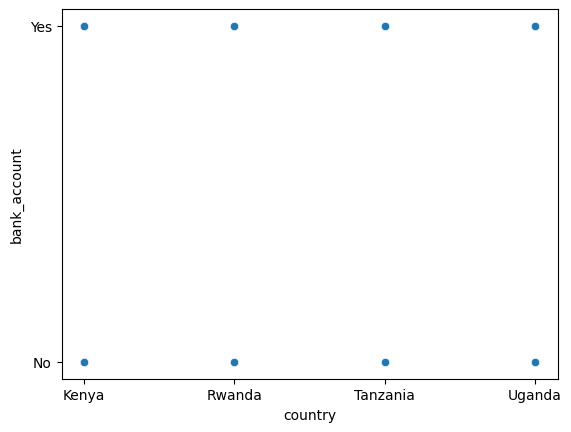

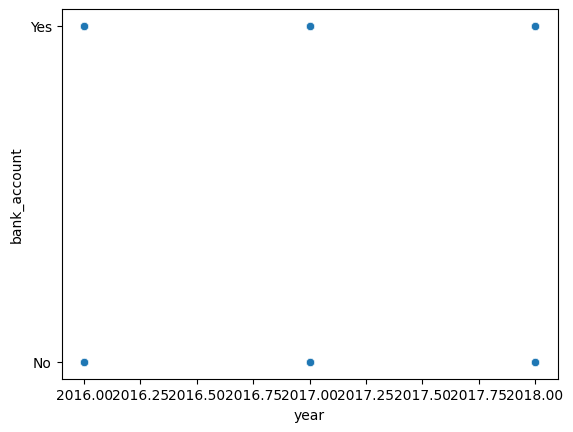

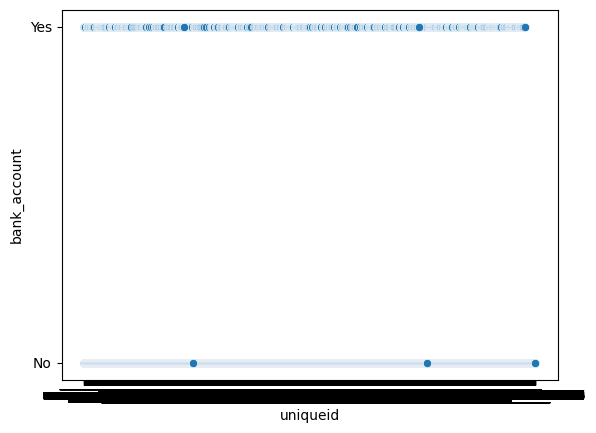

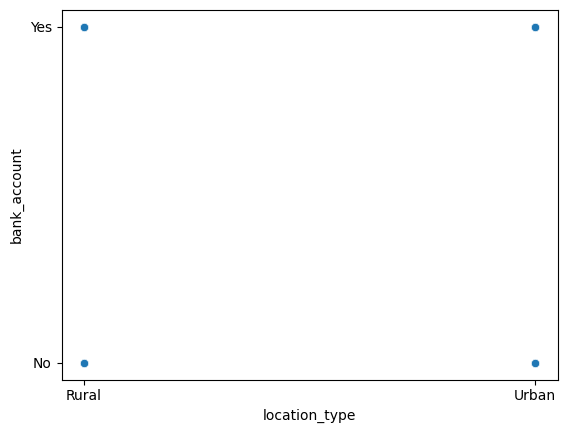

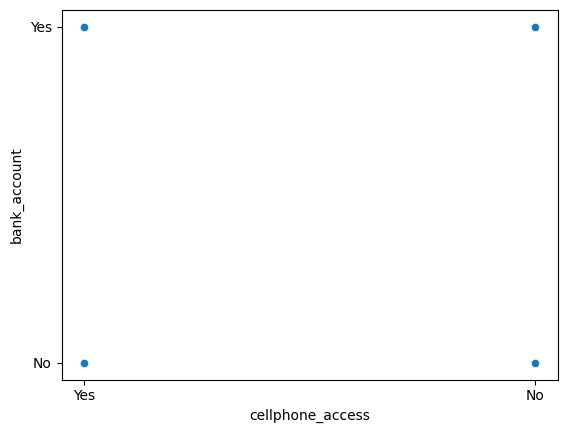

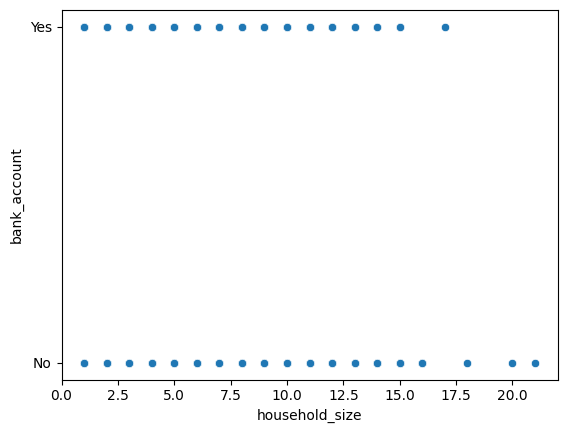

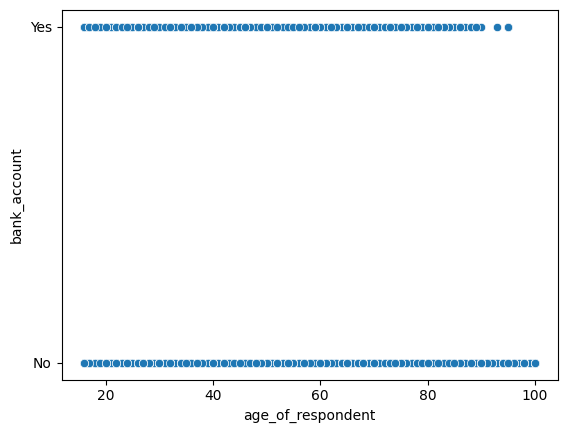

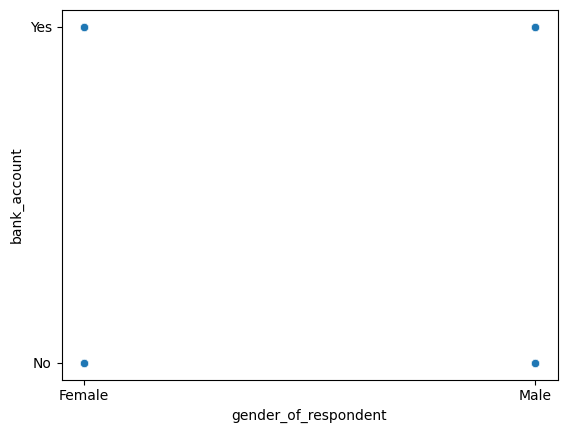

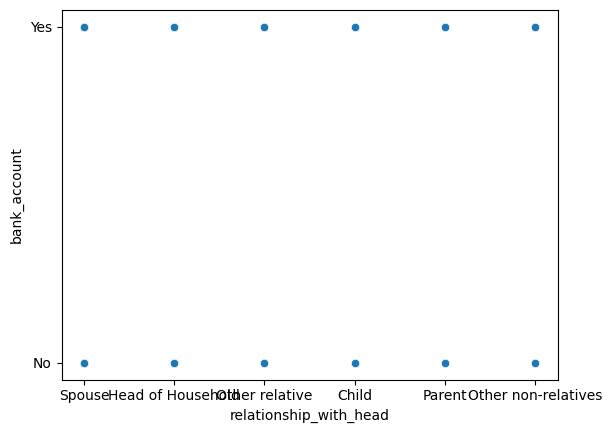

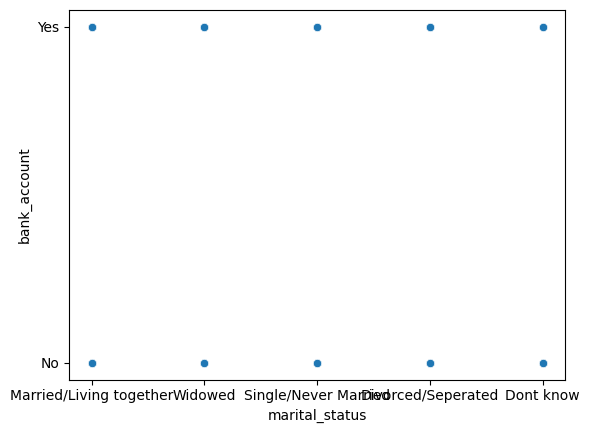

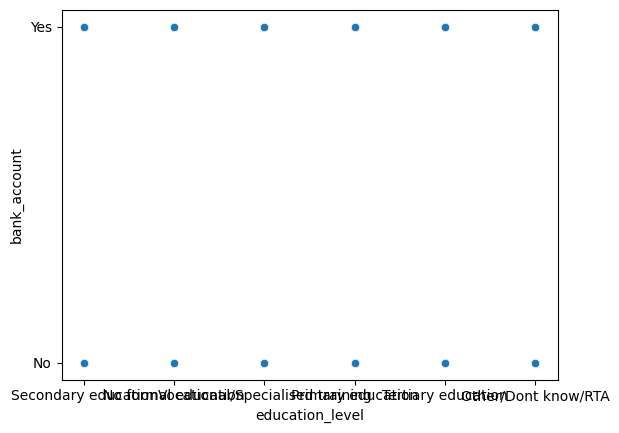

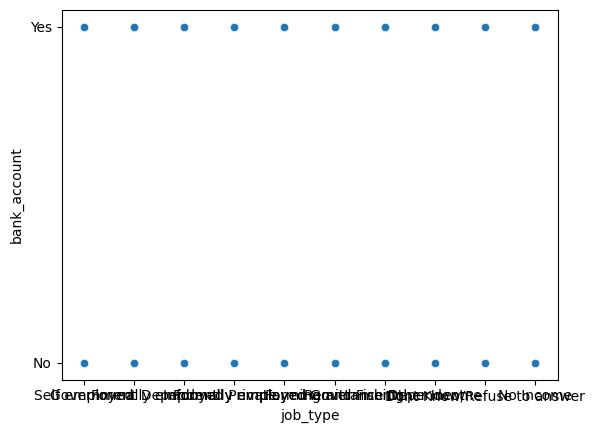

In [ ]:
#scatter plot to understand the relationship
for i in ['country', 'year', 'uniqueid', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']:
  sns.scatterplot(data=data, x=i, y='bank_account')
  plt.show()

In [ ]:
# correlation with heatmap to interpret the relation and multicolliniarity of the numerical column
data.select_dtypes(include='number').corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


<Axes: >

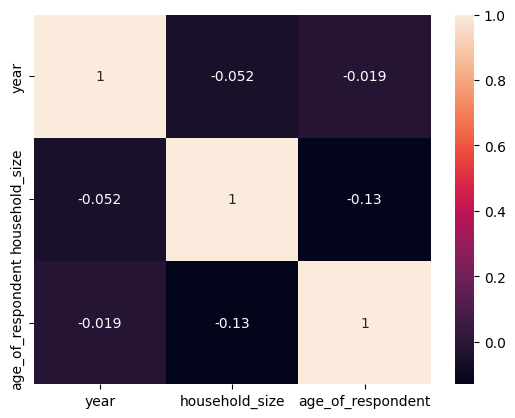

In [ ]:
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)

##5] Missing Value Treatment

In [ ]:
# choose the method of imputing missing values
#Like mean, median, mode or KNNImputer
#data.isnull().sum()       ###mine has no missing values

In [ ]:
#for i in[##'columns with missings']:
         #data[i].fillna(data[i].mode(), inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
inpute = KNNImputer()

In [ ]:
for i in data.select_dtypes(include='number').columns:
  data[i] = inpute.fit_transform(data[[i]])

In [ ]:
#data.isnull().sum()

##6] Outliers treatment

In [ ]:
# Decide whether to do outliers treatment or not
def wisker(col):
  q1,q3 = np.quantile(col, [0.25,0.75])
  iqr = q3-q1
  lw = q1-(1.5*iqr)
  uw = q3+(1.5*iqr)
  return lw, uw

In [ ]:
wisker(data['household_size'])

(np.float64(-2.5), np.float64(9.5))

In [ ]:
for i in ['household_size', 'age_of_respondent']:
  lw, uw = wisker(data[i])
  data[i] = np.where(data[i]<lw, lw, data[i])
  data[i] = np.where(data[i]>uw, uw, data[i])

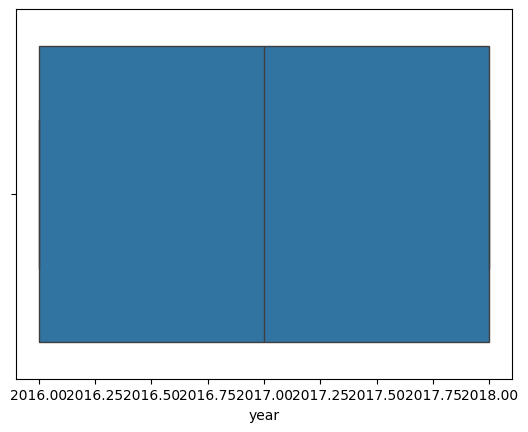

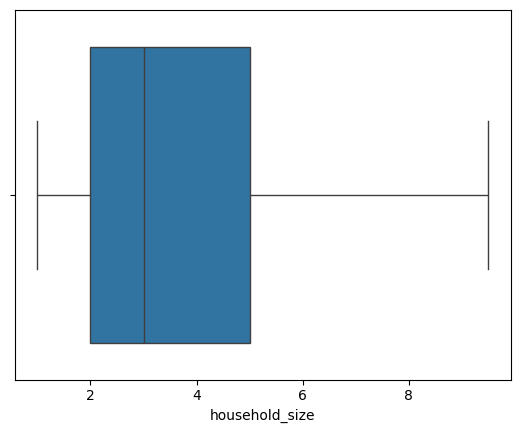

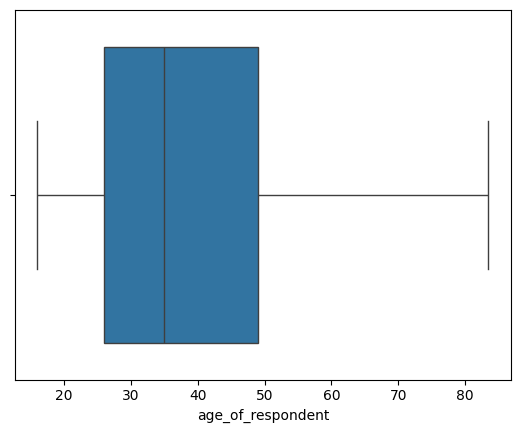

In [ ]:
#Recheck for outliers
for i in data.select_dtypes(include='number').columns:
  sns.boxplot(data=data, x=i)
  plt.show()

In [ ]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

##7] Duplicates and gabage value treatments


In [ ]:
#check for duplicates if we have any unique column in the data set, delete
#clean the garbage value


In [ ]:
data.drop_duplicates(inplace=True)

##8] Normalization

In [ ]:
# Do label encoding and one hot encoding with pd.getdummies
dummy = pd.get_dummies(data, columns=['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
                              'marital_status', 'education_level', 'job_type'], drop_first=True)

In [ ]:
dummy

,country,year,uniqueid,bank_account,household_size,age_of_respondent,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,Kenya,2018.0,uniqueid_1,Yes,3.0,24.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Kenya,2018.0,uniqueid_2,No,5.0,70.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,Kenya,2018.0,uniqueid_3,Yes,5.0,26.0,True,True,True,False,...,True,False,False,False,False,False,False,False,False,True
3,Kenya,2018.0,uniqueid_4,No,5.0,34.0,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
4,Kenya,2018.0,uniqueid_5,No,8.0,26.0,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018.0,uniqueid_2113,No,4.0,48.0,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
23520,Uganda,2018.0,uniqueid_2114,No,2.0,27.0,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
23521,Uganda,2018.0,uniqueid_2115,No,5.0,27.0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
23522,Uganda,2018.0,uniqueid_2116,No,7.0,30.0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True


##9] Encoding of Data

##ML Overview.

In [ ]:
##Install Pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [63]:
#Get our model
#from pycaret.regression import *

In [65]:
#Set up our model
#setup(data, target='bank_account',session_id=123, ignore_features=['uniqueid'],categorical_features=['location_type', 'gender_of_respondent'])

In [66]:
#compare_models()

In [67]:
#evaluate_model(rf_model)